# 03 TerraSAR-X interferometry analysis using the Orfeo Toolbox

## <a name="quicklink">Quick link

* [Objective](#objective)
* [Data](#data)
* [Workflow](#workflow)
* [License](#license)

## <a name="objective">Objective 

The objective of this example is to show how to plot the phase and intensity of a TerraSAR-X interferogram.

## <a name="data">Data

The data used is an interferometric pair generated using the SNAP Toolbox.

## <a name="workflow">Workflow

#### Import the Python modules

In [1]:
%matplotlib inline
import sys
import os
sys.path.append('/opt/OTB-6.2.0/lib/python')
os.environ['OTB_APPLICATION_PATH'] = '/opt/OTB-6.2.0/lib/otb/applications'
os.environ['LD_LIBRARY_PATH'] = '/opt/OTB-5.10.0/lib'
os.environ['ITK_AUTOLOAD_PATH'] = '/opt/OTB-6.2.0/lib/otb/applications'
import otbApplication
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings("ignore")

#### Extract a subset using the Orfeo Toolbox

In [2]:
base_path = 'http://sb-10-16-10-27.dev.terradue.int:50075/streamFile/ciop/run/dcs-snap-TSX-ifg/0000001-171101000009324-oozie-oozi-W/_results'

In [3]:
url_q = '/vsicurl/%s/%s' % ( base_path, 'TSX_IFG_q_ifg_HH_21Jun2013_30May2013.tif')
url_i = '/vsicurl/%s/%s' % ( base_path, 'TSX_IFG_i_ifg_HH_21Jun2013_30May2013.tif')
url_coherence = '/vsicurl/%s/%s' % ( base_path, 'TSX_IFG_coh_HH_21Jun2013_30May2013.tif' )

urls_input = [url_q, url_i, url_coherence]

In [4]:
ulx = 800
uly = 2800
lrx = 9800
lry = 12800

startx = ulx 
starty = uly

sizex = lrx - ulx + 1 
sizey = lry - uly + 1

print(sizex, sizey)

(9001, 10001)


In [5]:
results = []

for index, item in enumerate(urls_input, start = 0):
    app = otbApplication.Registry.CreateApplication("ExtractROI")
    app.SetParameterString('in', item)
    app.SetParameterString('in', item)
    app.SetParameterString('mode', 'extent')
    app.SetParameterFloat('mode.extent.ulx', ulx)
    app.SetParameterFloat('mode.extent.uly', uly)
    app.SetParameterFloat('mode.extent.lrx', lrx)
    app.SetParameterFloat('mode.extent.lry', lry)
    app.SetParameterInt('startx', startx)
    app.SetParameterInt('starty', starty)
    app.SetParameterInt('sizex', sizex)
    app.SetParameterInt('sizey', sizey)
    app.Execute()

    result = app.GetVectorImageAsNumpyArray("out")
    band = np.ndarray(shape=(sizey, sizex, 1), dtype=np.float32)
    band[..., 0] = result[:,:,0]
    results.append(band)

#### Plot the coherence

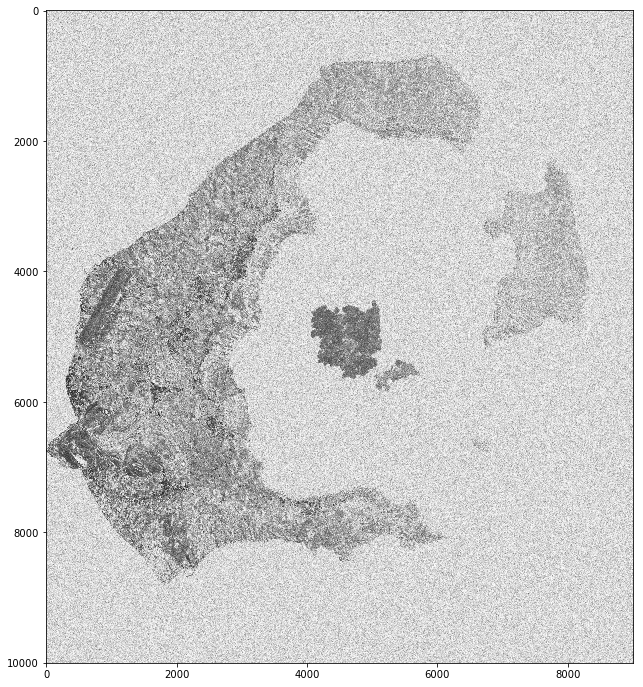

In [6]:
results[2].shape = sizey, sizex
plt.figure(figsize=(12, 12))
plt.imshow (results[2], cmap=plt.cm.binary, vmin=0, vmax = 1)

#### Calculate and plot the intensity

In [7]:
intensity = results[0] * results[0] + results[1] * results[1]

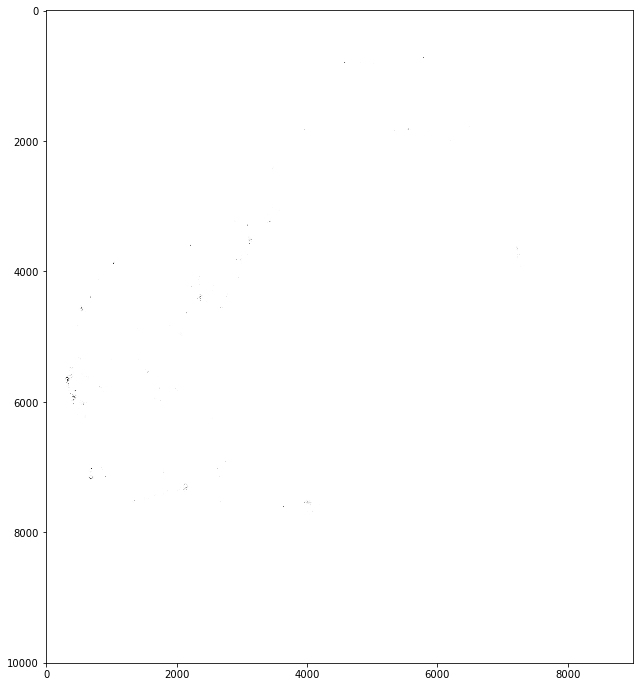

In [8]:
intensity.shape = sizey, sizex
plt.figure(figsize=(12, 12))
plt.imshow (intensity, cmap=plt.cm.binary) #, vmin=0, vmax = 0.000100000)

#### Calculate and plot the phase

In [9]:
phase = np.arctan2(results[0],results[1])

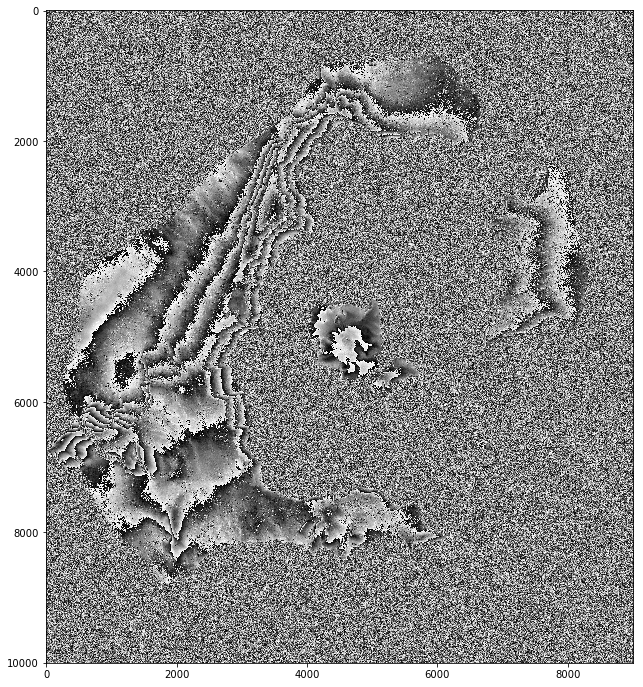

In [10]:
phase.shape = sizey, sizex
plt.figure(figsize=(12, 12))
plt.imshow (phase, cmap=plt.cm.binary) #, vmin=0, vmax = 1)

## <a name="license">License

This work is licenced under a [Attribution-ShareAlike 4.0 International License (CC BY-SA 4.0)](http://creativecommons.org/licenses/by-sa/4.0/) 

YOU ARE FREE TO:

* Share - copy and redistribute the material in any medium or format.
* Adapt - remix, transform, and built upon the material for any purpose, even commercially.

UNDER THE FOLLOWING TERMS:

* Attribution - You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.
* ShareAlike - If you remix, transform, or build upon the material, you must distribute your contributions under the same license as the original.